# Neural Network from Scratch


## Import libraries

We will be using the lower resolution MINST data set

In [1]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

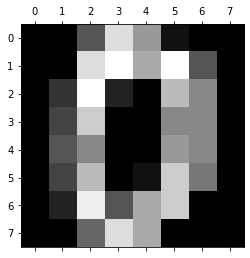

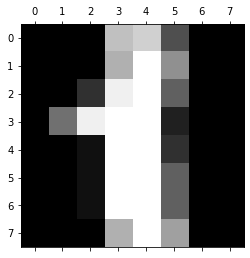

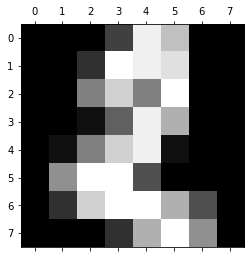

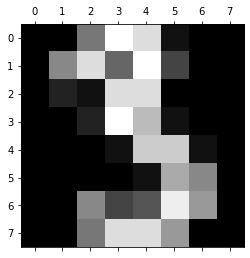

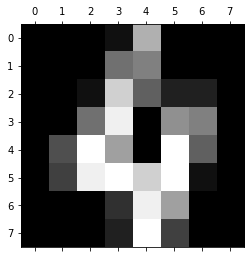

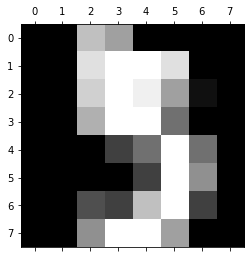

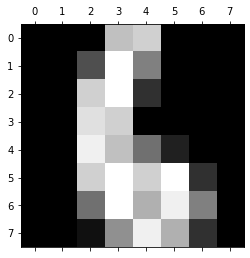

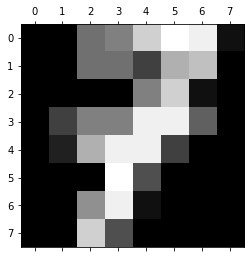

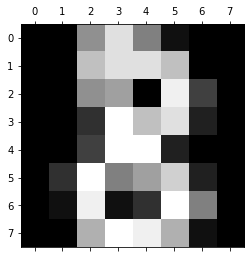

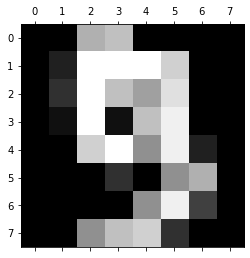

y [0]
x [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [2]:
# load all the digits (img)

digits = load_digits()

# load the data from the digit (img)

data = digits.data

print("The shape of the digits dataset:") 
print(digits.data.shape)
# plot the digits
plt.gray()

# and .matshow() with argument digit.images[xx]
for i in range(10):
    plt.matshow(digits.images[i])

plt.show()

# get the gt for this digit img

X = data
y = digits.target

print("y", y[0:1])
print("x", X[0,:])

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [3]:
# use the stander lib to scale the data
# init the scaler 
scaler = StandardScaler()

# fit the data to the scaler 
scaler.fit(X)

# Looking the new features after scaling
x_scaled = scaler.transform(X)

print("Before Scaling: \n", X)
print("After Scaling: \n", x_scaled)


Before Scaling: 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
After Scaling: 
 [[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [4]:
#Split the data into training and test set.  60% training and %40 test

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.6, test_size=0.4)

## 3) Setting up the output layer

### One hot encoding

In [5]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.

    y_vector = np.zeros((y.size, y.max()+1))
    y_vector[np.arange(y.size), y] = 1

    return y_vector

Converting the training and test targets to vectors 

In [6]:
# convert digits to vectors using the func above
# appky this to both train and test splits

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)


A quick check to see that our code performs as we expect 

In [7]:
print(y_train[0:4])
print(y_v_train[0:4])

[2 3 2 3]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 4) Creating the neural network

### The activation function and its derivative

In [8]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
def f(z):
    return 1/(1+np.exp(-z))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def f_deriv(z):
    return f(z)*(1-f(z))

### Creating and initialing W and b


In [9]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    weight = {}

    #creating a dictionary for bias i.e. a set of key: value pairs
    b = {}

    for i in range(len(nn_structure) - 1):
        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        weight[i+1] = np.random.random_sample((nn_structure[i+1], nn_structure[i])) - 0.5
        b[i+1] = np.random.random_sample((nn_structure[i+1], 1)) - 0.5
        

        
    # Return weight and b
    return weight, b

nn_structure = [64, 30, 10]
weight, b, = setup_and_init_weights(nn_structure)

#print("Weights \n", weight)
#print("Bieas \n", b)

### Initializing $\triangledown W$ and $\triangledown b$


In [10]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
    dlt_W = {}
    dlt_b = {}
    
    # use for loop to init the dlt W and dlt b
        # you can use np.zeros
        
    for i in range(len(nn_structure)-1):
        dlt_W[i+1] = np.zeros((nn_structure[i+1], nn_structure[i]))
        dlt_b[i+1] = np.zeros((nn_structure[i+1], 1))
    
    return dlt_W, dlt_b

dlt_W, dlt_b = init_tri_values(nn_structure)
#print("dlt_W \n", dlt_W)
#print("dlt_b \n", dlt_b)


## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [11]:
def feed_forward(nn_structure, x, W, b, f):
    # create a dictionary for holding the a values for all levels
    a_dict = {}
    a_dict[0]=x
    # create a dictionary for holding the z values for all the layers
    z_dict = {}
    # for each layer
    for i in range(len(nn_structure)-1): 
        z_dict[i+1] = np.dot(W[i+1], a_dict[i]) + b[i+1]
        a_dict[i+1] = f(z_dict[i+1])
        
    return a_dict, z_dict

## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  



In [12]:
def calculate_out_layer_delta(y, a_out, z_out, f_deriv):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out)*f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l, f_deriv):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.matmul(w_l.T, delta_plus_1)*f_deriv(z_l)

## The Back Propagation Algorithm


In [13]:
def train_nn(f, f_deriv, nn_structure, X, y, iter_num=3000, alpha=0.25):
    # init W and b
    W, b = setup_and_init_weights(nn_structure)
    # init counter to 0
    ctr = 0
    # store the length of data
    l = X.shape[0]
    # init a list to store the all costs
    costs = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    # while the counter is less than the max iterations:
    while ctr < iter_num:
        # print the iteration number for every 1000 iter
        if (ctr%100==0):
            print("Iteration", ctr, "out of", iter_num)
        # init delt_W and delt_b
        delt_W, delt_b = init_tri_values(nn_structure)
        # init the cost to 0
        cost = 0
        # for each data:
        for i in range(l):
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            x = X[i][:, np.newaxis]
            Y = y[i][:, np.newaxis]
            
            a, z = feed_forward(nn_structure, x, W, b, f)
            cost += np.sum((Y-a[len(nn_structure)-1])**2)
            # loop from nl-1 to 1 backpropagating the errors
            for j in range(len(nn_structure)-1, 0, -1):
                if j == len(nn_structure)-1:
                    delta = calculate_out_layer_delta(Y, a[len(nn_structure)-1], z[len(nn_structure)-1], f_deriv)
                    
                else:
                    delta = calculate_hidden_delta(delta, W[j+1], z[j], f_deriv)
                
                delt_W[j] += np.matmul(delta, a[j-1].T)
                delt_b[j] += delta
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                        # hit: you can use np.newaxis to increase the number of dimensions
                        
                    # trib^(l) = trib^(l) + delta^(l+1)

                
        # perform the gradient descent step for the weights in each layer
        for m in range(len(nn_structure)-1):
            W[m+1] -= alpha*delt_W[m+1]/l
            b[m+1] -= alpha*delt_b[m+1]/l
        
        
        # complete the average cost (mean squared error) calculation
        cost = cost/l
        # append the cost to the cost list
        costs.append(cost)
        # increase the counter 
        ctr += 1
        
    return W, b, costs

In [14]:
def predict_y(W, b, X, n_layers, f):
    # store the length of data
    l = X.shape[0]
    # init for prediction array
    pred_arr = []
    # for each data:
    for i in range(l):
        x = X[i][:, np.newaxis]
        a, z = feed_forward(nn_structure, x, W, b, f)
        
        pred = np.argmax(a[len(nn_structure)-1])
        pred_arr.append(pred)
        
    return pred_arr

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [15]:
nn_structure = [64, 30, 10]
    
# train the NN with the nn_structure and 3000 iterations

W, b, costs = train_nn(f, f_deriv, nn_structure, X_train, y_v_train)


Starting gradient descent for 3000 iterations
Iteration 0 out of 3000
Iteration 100 out of 3000
Iteration 200 out of 3000
Iteration 300 out of 3000
Iteration 400 out of 3000
Iteration 500 out of 3000
Iteration 600 out of 3000
Iteration 700 out of 3000
Iteration 800 out of 3000
Iteration 900 out of 3000
Iteration 1000 out of 3000
Iteration 1100 out of 3000
Iteration 1200 out of 3000
Iteration 1300 out of 3000
Iteration 1400 out of 3000
Iteration 1500 out of 3000
Iteration 1600 out of 3000
Iteration 1700 out of 3000
Iteration 1800 out of 3000
Iteration 1900 out of 3000
Iteration 2000 out of 3000
Iteration 2100 out of 3000
Iteration 2200 out of 3000
Iteration 2300 out of 3000
Iteration 2400 out of 3000
Iteration 2500 out of 3000
Iteration 2600 out of 3000
Iteration 2700 out of 3000
Iteration 2800 out of 3000
Iteration 2900 out of 3000


### Plotting the learning curve


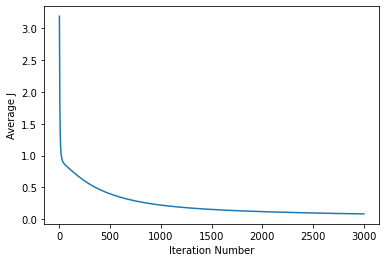

In [17]:
# plot the avg_cost_func 
iter_num = 3000
avg_cost_func = [i for i in range(iter_num)]
plt.plot(avg_cost_func, costs)
# x label: "Iteration number"
plt.xlabel("Iteration Number")
# y label: "Average J"
plt.ylabel("Average J")
plt.show()

## 5) Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [18]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, nn_structure, f)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 95.54937413073714%


### ReLU

In [15]:
def ReLU(z):
    A = np.amax(z, axis=1, initial = 0)[:, np.newaxis]
    return A

def ReLU_deriv(z):
    A = (z>0).astype(int)
    return A

In [16]:
nn_structure = [64, 30, 10]
iter_num = 3000
    
# train the NN with the nn_structure and 3000 iterations

W, b, costs = train_nn(ReLU, ReLU_deriv, nn_structure, X_train, y_v_train, iter_num)


Starting gradient descent for 3000 iterations
Iteration 0 out of 3000
Iteration 100 out of 3000
Iteration 200 out of 3000
Iteration 300 out of 3000
Iteration 400 out of 3000
Iteration 500 out of 3000
Iteration 600 out of 3000
Iteration 700 out of 3000
Iteration 800 out of 3000
Iteration 900 out of 3000
Iteration 1000 out of 3000
Iteration 1100 out of 3000
Iteration 1200 out of 3000
Iteration 1300 out of 3000
Iteration 1400 out of 3000
Iteration 1500 out of 3000
Iteration 1600 out of 3000
Iteration 1700 out of 3000
Iteration 1800 out of 3000
Iteration 1900 out of 3000
Iteration 2000 out of 3000
Iteration 2100 out of 3000
Iteration 2200 out of 3000
Iteration 2300 out of 3000
Iteration 2400 out of 3000
Iteration 2500 out of 3000
Iteration 2600 out of 3000
Iteration 2700 out of 3000
Iteration 2800 out of 3000
Iteration 2900 out of 3000


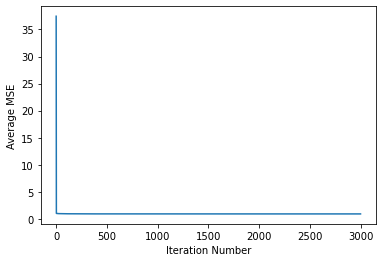

In [17]:
# plot the avg_cost_func 
avg_cost_func = [i for i in range(iter_num)]
plt.plot(avg_cost_func, costs)
# x label: "Iteration number"
plt.xlabel("Iteration Number")
# y label: "Average J"
plt.ylabel("Average MSE")
plt.show()

In [18]:
y_pred = predict_y(W, b, X_test, nn_structure, ReLU)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 18.497913769123784%


### Tanh

In [16]:
def tanh(z):
    return 2.0/(1+np.exp(-2*z))-1

def tanh_deriv(z):
    return 1-tanh(z)**2

In [16]:
nn_structure = [64, 30, 10]
iter_num = 3000
    
# train the NN with the nn_structure and 3000 iterations

W, b, costs = train_nn(tanh, tanh_deriv, nn_structure, X_train, y_v_train, iter_num)


Starting gradient descent for 3000 iterations
Iteration 0 out of 3000
Iteration 100 out of 3000
Iteration 200 out of 3000
Iteration 300 out of 3000
Iteration 400 out of 3000
Iteration 500 out of 3000
Iteration 600 out of 3000
Iteration 700 out of 3000
Iteration 800 out of 3000
Iteration 900 out of 3000
Iteration 1000 out of 3000
Iteration 1100 out of 3000
Iteration 1200 out of 3000
Iteration 1300 out of 3000
Iteration 1400 out of 3000
Iteration 1500 out of 3000
Iteration 1600 out of 3000
Iteration 1700 out of 3000
Iteration 1800 out of 3000
Iteration 1900 out of 3000
Iteration 2000 out of 3000
Iteration 2100 out of 3000
Iteration 2200 out of 3000
Iteration 2300 out of 3000
Iteration 2400 out of 3000
Iteration 2500 out of 3000
Iteration 2600 out of 3000
Iteration 2700 out of 3000
Iteration 2800 out of 3000
Iteration 2900 out of 3000


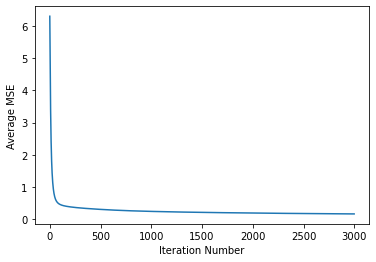

In [17]:
# plot the avg_cost_func 
avg_cost_func = [i for i in range(iter_num)]
plt.plot(avg_cost_func, costs)
# x label: "Iteration number"
plt.xlabel("Iteration Number")
# y label: "Average J"
plt.ylabel("Average MSE")
plt.show()

In [18]:
y_pred = predict_y(W, b, X_test, nn_structure, tanh)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 93.3240611961057%


The best activation function seems to be the sigmoid function, as it gives the best prediction accuracy of more than 95%. The worst one is the ReLU finction.

## Tweaking the Hyperparameters

In [15]:
iter_num = 3000
nn_structure = [64, 50, 30, 10]
print("Sigmoid with tweaked parameters")
W, b, costs = train_nn(f, f_deriv, nn_structure, X_train, y_v_train)


Sigmoid with tweaked parameters
Starting gradient descent for 3000 iterations
Iteration 0 out of 3000
Iteration 100 out of 3000
Iteration 200 out of 3000
Iteration 300 out of 3000
Iteration 400 out of 3000
Iteration 500 out of 3000
Iteration 600 out of 3000
Iteration 700 out of 3000
Iteration 800 out of 3000
Iteration 900 out of 3000
Iteration 1000 out of 3000
Iteration 1100 out of 3000
Iteration 1200 out of 3000
Iteration 1300 out of 3000
Iteration 1400 out of 3000
Iteration 1500 out of 3000
Iteration 1600 out of 3000
Iteration 1700 out of 3000
Iteration 1800 out of 3000
Iteration 1900 out of 3000
Iteration 2000 out of 3000
Iteration 2100 out of 3000
Iteration 2200 out of 3000
Iteration 2300 out of 3000
Iteration 2400 out of 3000
Iteration 2500 out of 3000
Iteration 2600 out of 3000
Iteration 2700 out of 3000
Iteration 2800 out of 3000
Iteration 2900 out of 3000


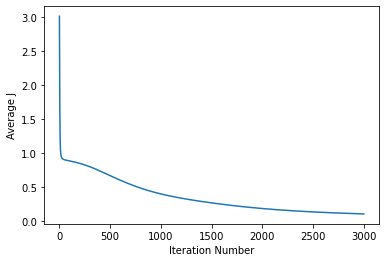

In [16]:
# plot the avg_cost_func 
avg_cost_func = [i for i in range(iter_num)]
plt.plot(avg_cost_func, costs)
# x label: "Iteration number"
plt.xlabel("Iteration Number")
# y label: "Average J"
plt.ylabel("Average J")
plt.show()

In [17]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, nn_structure, f)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 94.29763560500696%


In [17]:
nn_structure = [64, 50, 30, 10]
iter_num = 3000
print("Tanh with tweaked parameters")
    
# train the NN with the nn_structure and 3000 iterations

W, b, costs = train_nn(tanh, tanh_deriv, nn_structure, X_train, y_v_train, iter_num)


Starting gradient descent for 3000 iterations
Iteration 0 out of 3000
Iteration 100 out of 3000
Iteration 200 out of 3000
Iteration 300 out of 3000
Iteration 400 out of 3000
Iteration 500 out of 3000
Iteration 600 out of 3000
Iteration 700 out of 3000
Iteration 800 out of 3000
Iteration 900 out of 3000
Iteration 1000 out of 3000
Iteration 1100 out of 3000
Iteration 1200 out of 3000
Iteration 1300 out of 3000
Iteration 1400 out of 3000
Iteration 1500 out of 3000
Iteration 1600 out of 3000
Iteration 1700 out of 3000
Iteration 1800 out of 3000
Iteration 1900 out of 3000
Iteration 2000 out of 3000
Iteration 2100 out of 3000
Iteration 2200 out of 3000
Iteration 2300 out of 3000
Iteration 2400 out of 3000
Iteration 2500 out of 3000
Iteration 2600 out of 3000
Iteration 2700 out of 3000
Iteration 2800 out of 3000
Iteration 2900 out of 3000


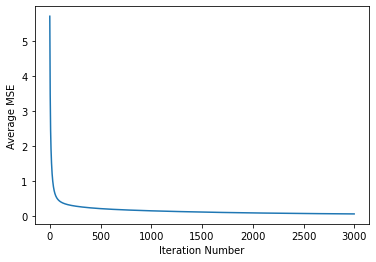

In [18]:
# plot the avg_cost_func 
avg_cost_func = [i for i in range(iter_num)]
plt.plot(avg_cost_func, costs)
# x label: "Iteration number"
plt.xlabel("Iteration Number")
# y label: "Average J"
plt.ylabel("Average MSE")
plt.show()

In [19]:
y_pred = predict_y(W, b, X_test, nn_structure, tanh)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 96.105702364395%


With the tweaked parameters, the tanh function performs better than the sigmoid function by 2%, which is the opposite of the first run. This means that both of these functions are learning very well after the iterations and both of them can be used, and we should always try running both with different hyperparameters, and then decide which one is more suitable.